### Data Exploration and Cleaning

Importing related libraries and read the file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
notebook_path = r"/content/drive/MyDrive/SOCIAL_MEDIA"
os.chdir(notebook_path)
!pwd

df = pd.read_csv('Job_Tweets.csv')
df.head()

Mounted at /content/drive
/content/drive/MyDrive/SOCIAL_MEDIA


,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,NaN,0,1,0,"<a href=""http://instagram.com"" rel=""nofollow"">...","20 miles SE of Taos, NM",False,3342,258
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",Arizona,False,63,129
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...","Texas, USA",False,19,50
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Orange County, California",False,966,1569
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251


In [ ]:
# list all column names in the dataset
list(df.columns)

['ID',
 'Timestamp',
 'User',
 'Text',
 'Hashtag',
 'Retweets',
 'Likes',
 'Replies',
 'Source',
 'Location',
 'Verified_Account',
 'Followers',
 'Following']

In [ ]:
# to check dimensions of the dataset
print("Dimensions of the dataset:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Dimensions of the dataset:
Number of rows: 50000
Number of columns: 13


In [ ]:
# to get a summary of data types and non-null values
print("Summary of data types and non-null values:")
df.info()

Summary of data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                50000 non-null  int64 
 1   Timestamp         50000 non-null  object
 2   User              50000 non-null  object
 3   Text              50000 non-null  object
 4   Hashtag           40684 non-null  object
 5   Retweets          50000 non-null  int64 
 6   Likes             50000 non-null  int64 
 7   Replies           50000 non-null  int64 
 8   Source            50000 non-null  object
 9   Location          44011 non-null  object
 10  Verified_Account  50000 non-null  bool  
 11  Followers         50000 non-null  int64 
 12  Following         50000 non-null  int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 4.6+ MB


In [ ]:
# convert data type of user ID from int to object
df["ID"] = df["ID"].astype(object)
df.dtypes

,0
ID,object
Timestamp,object
User,object
Text,object
Hashtag,object
Retweets,int64
Likes,int64
Replies,int64
Source,object
Location,object


In [ ]:
# convert timestamp to datetime
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df[['Date']].head()

,Date
0,2019-12-30
1,2019-12-30
2,2019-12-30
3,2019-12-30
4,2019-12-30


In [ ]:
import re

# remove URL and HTML tags
df['Source'] = df['Source'].apply(lambda x: re.sub(r'http\S+', '', x))
df['Source'] = df['Source'].apply(lambda x: re.sub(r'<.*?>', '', x))
df[['Source']].head()

,Source
0,Instagram
1,Jobvite
2,Jobvite
3,ZipRecruiter Post Jobs
4,ZipRecruiter Post Jobs


In [ ]:
# describing categorical data
df.describe(include='object')

,ID,Timestamp,User,Text,Hashtag,Source,Location,Date
count,50000,50000,50000,50000,40684,50000,44011,50000
unique,50000,46795,13715,46507,14227,261,5973,150
top,1211798864656769025,2019-12-18 20:00:41+00:00,cameroncraig,We generally enjoy and are satisfied by being ...,"['hiring', 'jobs', 'Houston']",ZipRecruiter Post Jobs,United States,2021-12-14
freq,1,8,2513,134,792,21888,3504,781


In [ ]:
# describing numerical data
df.describe()

,Retweets,Likes,Replies,Followers,Following
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,0.692100,1.347860,0.108920,5.511382e+03,1961.965460
std,7.441484,17.527216,1.276483,6.770825e+04,5847.789338
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,8.000000e+01,94.000000
50%,0.000000,0.000000,0.000000,2.980000e+02,331.000000
75%,0.000000,0.000000,0.000000,1.258000e+03,1076.000000
max,1016.000000,1677.000000,175.000000,5.226473e+06,310791.000000


In [ ]:
# to check for any missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID                     0
Timestamp              0
User                   0
Text                   0
Hashtag             9316
Retweets               0
Likes                  0
Replies                0
Source                 0
Location            5989
Verified_Account       0
Followers              0
Following              0
Date                   0
dtype: int64


In [ ]:
df["Hashtag"].fillna("[ ]", inplace = True)
df["Location"].fillna("No Location", inplace = True)

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID                  0
Timestamp           0
User                0
Text                0
Hashtag             0
Retweets            0
Likes               0
Replies             0
Source              0
Location            0
Verified_Account    0
Followers           0
Following           0
Date                0
dtype: int64


<ipython-input-12-f7a0cd562d77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hashtag"].fillna("[ ]", inplace = True)
<ipython-input-12-f7a0cd562d77>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
# to count the number of duplicated rows
duplicate_rows = df.duplicated()
num_duplicates = sum(duplicate_rows)
print(num_duplicates)

0


In [ ]:
df.head()

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Date
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,[ ],0,1,0,Instagram,"20 miles SE of Taos, NM",False,3342,258,2019-12-30
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,Jobvite,Arizona,False,63,129,2019-12-30
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,Jobvite,"Texas, USA",False,19,50,2019-12-30
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,ZipRecruiter Post Jobs,"Orange County, California",False,966,1569,2019-12-30
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,ZipRecruiter Post Jobs,United States,False,983,1251,2019-12-30


<br>

###Test Preprocessing

DATA PREPROCESSING FOR TEXT: <br>
1. Noise Reduction --> remove noise such as punctuation, special characters, and irrelevant symbols
2. Normalization --> standardize variations for different form of words that can convey same meaning
3. Tokenization --> broken down text data into smaller units such as words or phrases
4. Stopword Removal --> removal stopword such as "the", "is", "and"
5. Feature Selection -->  extracting features from text for building machine learning models
6. Dimensionality Reduction --> transformation of text data from a high-dimensional space into a low-dimensional space

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
nltk.data.path.append("C:\\nltk_data")  # Manually set the NLTK data path
nltk.download('stopwords', download_dir="C:\\nltk_data")
nltk.download('punkt', download_dir="C:\\nltk_data")
nltk.download('wordnet', download_dir="C:\\nltk_data")

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# 1. Noise Reduction
def remove_noise(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters, punctuation
    return text

In [ ]:
# 2. Normalization: Lowercasing & Lemmatization
lemmatizer = WordNetLemmatizer()
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    words = nltk.word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    return ' '.join(words)

In [ ]:
# 3. Tokenization (Already integrated in Normalization)
def tokenize_text(text):
    return nltk.word_tokenize(text)

In [ ]:
# 4. Stopword Removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
# Apply Preprocessing to the Dataset
def preprocess_text(text):
    text = remove_noise(text)
    text = normalize_text(text)
    text = remove_stopwords(text)
    return text

# Apply all preprocessing steps to the 'text' column (adjust column name if needed)
df['cleaned_text'] = df['Text'].apply(preprocess_text)  # Replace with your column name
df[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,Looking for an exciting job where you can ski ...,looking exciting job ski free ski area still h...
1,Hail in Phoenix - no way! New opportunity at ...,hail phoenix way new opportunity freedom possi...
2,Rackspace is hiring! We are looking for Nation...,rackspace hiring looking national partner mana...
3,We are #hiring Administrative Assistant in Nan...,hiring administrative assistant nanuet ny http...
4,We are #hiring Family Service Counselor in Irv...,hiring family service counselor irvine ca http...


In [ ]:
# 5. Feature Selection: Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 500 features
tfidf_features = vectorizer.fit_transform(df['cleaned_text'])
print("TF-IDF feature extraction complete. Shape:", tfidf_features.shape)

TF-IDF feature extraction complete. Shape: (50000, 500)


In [ ]:
# 6. Dimensionality Reduction using TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Reduce to 100 dimensions
reduced_features = svd.fit_transform(tfidf_features)
print("Dimensionality Reduction complete. Shape:", reduced_features.shape)

Dimensionality Reduction complete. Shape: (50000, 100)


In [ ]:
# Final preprocessed dataframe
df_features = pd.DataFrame(reduced_features, columns=[f'component_{i}' for i in range(1, 101)])
print("\nFinal reduced features:")
df_features.head()


Final reduced features:


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
0,0.103900,-0.107554,-0.104721,0.003526,0.016649,0.024788,-0.002656,-0.006017,0.010906,0.019019,...,0.030953,0.017071,-0.002522,-0.025504,0.026213,-0.048277,0.000258,-0.017865,0.008524,0.003007
1,0.095168,-0.123122,-0.100341,-0.014658,0.004422,-0.024770,-0.045597,0.011092,0.315226,0.028543,...,0.022674,0.031219,-0.004499,-0.003301,-0.022885,0.012269,0.012001,-0.005979,0.012413,-0.021114
2,0.142683,-0.175146,-0.032685,0.144696,0.128896,0.024677,0.008659,0.000044,-0.031468,0.073449,...,-0.011147,0.037607,0.018923,-0.060888,-0.010425,-0.051353,0.033863,-0.012720,-0.017106,0.013459
3,0.141298,-0.182258,0.141016,0.082337,0.015780,0.061341,-0.160554,0.047164,0.376408,-0.240594,...,-0.041797,-0.015967,0.029928,-0.060372,0.050842,-0.020130,-0.016683,0.031681,-0.066839,0.012594
4,0.077854,-0.103125,0.074733,-0.005292,-0.123505,0.076012,0.217890,-0.101161,0.022616,0.001144,...,-0.019000,-0.004981,0.012483,-0.018743,-0.001508,-0.019927,0.029903,0.007427,-0.009379,0.007011


In [ ]:
# Make a copy
cleaned_df = df.copy()
cleaned_df.head()

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Date,cleaned_text
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,[ ],0,1,0,Instagram,"20 miles SE of Taos, NM",False,3342,258,2019-12-30,looking exciting job ski free ski area still h...
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,Jobvite,Arizona,False,63,129,2019-12-30,hail phoenix way new opportunity freedom possi...
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,Jobvite,"Texas, USA",False,19,50,2019-12-30,rackspace hiring looking national partner mana...
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,ZipRecruiter Post Jobs,"Orange County, California",False,966,1569,2019-12-30,hiring administrative assistant nanuet ny http...
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,ZipRecruiter Post Jobs,United States,False,983,1251,2019-12-30,hiring family service counselor irvine ca http...


### Data Labeling

Install and import related libraries

In [ ]:
pip install transformers

In [ ]:
# Define the folder path for saving sentiment files
folder_path = "sentiment_analysis"

In [ ]:
import torch
from transformers import pipeline

Installations are successful. Now,  let's do sentiment analysis using Transformers. Let's try BERT.

In [ ]:
# Applying Transformers
sentiment_model = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')
def analyze_sentiment(text):
    result = sentiment_model(text)
    return result[0]['label']

cleaned_df['text_bert'] = cleaned_df['cleaned_text'].apply(analyze_sentiment)
cleaned_df[['text_bert', 'cleaned_text']].head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


,text_bert,cleaned_text
0,5 stars,looking exciting job ski free ski area still h...
1,3 stars,hail phoenix way new opportunity freedom possi...
2,5 stars,rackspace hiring looking national partner mana...
3,3 stars,hiring administrative assistant nanuet ny http...
4,5 stars,hiring family service counselor irvine ca http...


Let's do sentiment analysis with DistilBERT

In [ ]:
# Applying DistilBERT
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased", device=-1)
cleaned_df['text_distilbert'] = classifier(cleaned_df['cleaned_text'].tolist(), truncation=True, max_length=512)
cleaned_df['text_distilbert'] = cleaned_df['text_distilbert'].apply(lambda x: x['label'])
cleaned_df[['text_distilbert', 'cleaned_text']].head()

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


,text_distilbert,cleaned_text
0,LABEL_0,looking exciting job ski free ski area still h...
1,LABEL_1,hail phoenix way new opportunity freedom possi...
2,LABEL_1,rackspace hiring looking national partner mana...
3,LABEL_0,hiring administrative assistant nanuet ny http...
4,LABEL_1,hiring family service counselor irvine ca http...


<br>

###Data Visualization

Let's apply visualization for transformers. Let's try with BERT.

<ipython-input-32-9bda7032a094>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bert_counts.index, y=bert_counts.values, palette='viridis')


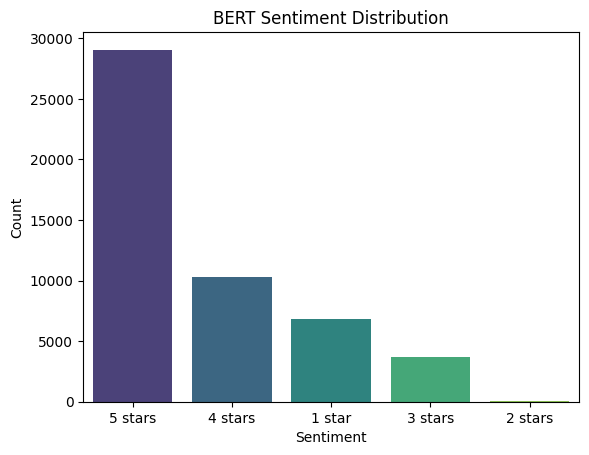

In [ ]:
bert_counts = cleaned_df['text_bert'].value_counts()
sns.barplot(x=bert_counts.index, y=bert_counts.values, palette='viridis')
plt.title('BERT Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

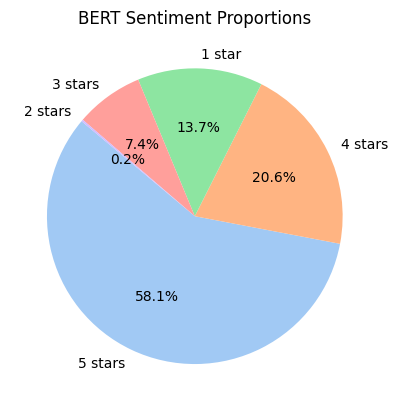

In [ ]:
bert_counts = cleaned_df['text_bert'].value_counts()
plt.pie(bert_counts.values, labels=bert_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('BERT Sentiment Proportions')
plt.show()

In [ ]:
# Count BERT sentiment
count_bert = cleaned_df['text_bert'].value_counts()
count_bert

,count
text_bert,
5 stars,29060
4 stars,10280
1 star,6844
3 stars,3718
2 stars,98


<br>

Displaying texts based on categories

In [ ]:
# Filter rows where text_bert is '1 star'
onestar_texts_bert = cleaned_df[cleaned_df['text_bert'] == '1 star']['cleaned_text']

# Display the result
print(onestar_texts_bert.head())

7     hiring outside sale representative irvine ca h...
10    looking hire full time baristasupervisor conta...
16    hiring locumtenens staffing perdiem locumsinc ...
50    hiring assembler el segundo ca httpstcoivxrhti...
85    hiring sale recruiteroffice manager springfiel...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "onestar_texts_bert.csv")
onestar_texts_bert.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/onestar_texts_bert.csv


In [ ]:
# Filter rows where text_bert is '2 stars'
twostar_texts_bert = cleaned_df[cleaned_df['text_bert'] == '2 stars']['cleaned_text']

# Display the result
print(twostar_texts_bert.head())

798     battytamara worked really hard government job ...
1909    two common new year resolution lose weight fin...
2406    looking highly dependable php application deve...
2481    nolanolegal arkansas presumably due diligence ...
2720    hearing quite company struggling job posting l...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "twostar_texts_bert.csv")
twostar_texts_bert.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/twostar_texts_bert.csv


In [ ]:
# Filter rows where text_bert is '3 stars'
threestar_texts_bert = cleaned_df[cleaned_df['text_bert'] == '3 stars']['cleaned_text']

# Display the result
print(threestar_texts_bert.head())

1     hail phoenix way new opportunity freedom possi...
3     hiring administrative assistant nanuet ny http...
61    hiring per diem home health physical therapist...
72    hiring physical therapist bolingbroke ga https...
99    hiring pharmacy technician tempe az httpstcoez...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "threestar_texts_bert.csv")
threestar_texts_bert.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/threestar_texts_bert.csv


In [ ]:
# Filter rows where text_bert is '4 stars'
fourstar_texts_bert = cleaned_df[cleaned_df['text_bert'] == '4 stars']['cleaned_text']

# Display the result
print(fourstar_texts_bert.head())

6     hiring community service counselor irvine ca h...
8     hiring workday hris manager irvine ca httpstco...
17    hail phoenix way new opportunity freedom possi...
27    hiring intermediate project manager ottawa htt...
31    hiring intermediate technical writer ottawa ht...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "fourstar_texts_bert.csv")
fourstar_texts_bert.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/fourstar_texts_bert.csv


In [ ]:
# Filter rows where text_bert is '5 stars'
fivestar_texts_bert = cleaned_df[cleaned_df['text_bert'] == '5 stars']['cleaned_text']

# Display the result
print(fivestar_texts_bert.head())

0    looking exciting job ski free ski area still h...
2    rackspace hiring looking national partner mana...
4    hiring family service counselor irvine ca http...
5    hiring inside sale representative irvine ca ht...
9    hiring restaurant manager hourly manager laure...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "fivestar_texts_bert.csv")
fivestar_texts_bert.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/fivestar_texts_bert.csv


<br>

Let's apply visualization for DISTILBERT.

<ipython-input-45-8323e283a9e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distilbert_counts.index, y=distilbert_counts.values, palette='coolwarm')


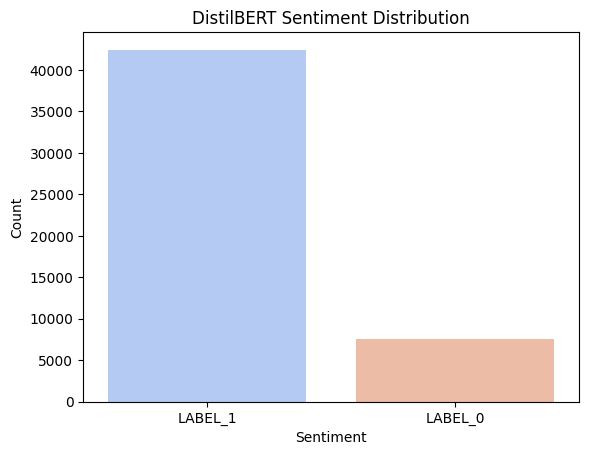

In [ ]:
distilbert_counts = cleaned_df['text_distilbert'].value_counts()
sns.barplot(x=distilbert_counts.index, y=distilbert_counts.values, palette='coolwarm')
plt.title('DistilBERT Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

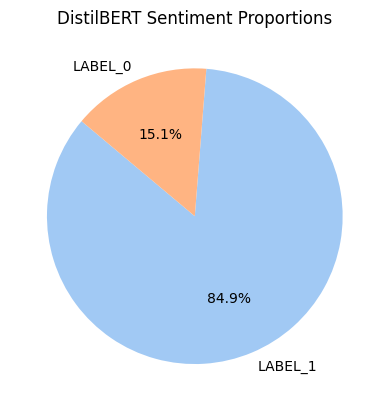

In [ ]:
distilbert_counts = cleaned_df['text_distilbert'].value_counts()
plt.pie(distilbert_counts.values, labels=distilbert_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('DistilBERT Sentiment Proportions')
plt.show()

In [ ]:
# Count DistilBERT sentiment
count_distilbert = cleaned_df['text_distilbert'].value_counts()
count_distilbert

,count
text_distilbert,
LABEL_1,42433
LABEL_0,7567


<br>

Displaying texts based on categories

In [ ]:
# Filter rows where text_distilbert is 'LABEL_0'
zero_texts_distilbert = cleaned_df[cleaned_df['text_distilbert'] == 'LABEL_0']['cleaned_text']

# Display the result
print(zero_texts_distilbert.head())

0     looking exciting job ski free ski area still h...
3     hiring administrative assistant nanuet ny http...
15    hiring click link job detail apply httpstcozts...
22    hiring middleware developersupport phoenix az ...
24    hiring etl informatica developer ottawa httpst...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "zero_texts_distilbert.csv")
zero_texts_distilbert.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/zero_texts_distilbert.csv


In [ ]:
# Filter rows where text_distilbert is 'LABEL_1'
one_texts_distilbert = cleaned_df[cleaned_df['text_distilbert'] == 'LABEL_1']['cleaned_text']

# Display the result
print(one_texts_distilbert.head())

1    hail phoenix way new opportunity freedom possi...
2    rackspace hiring looking national partner mana...
4    hiring family service counselor irvine ca http...
5    hiring inside sale representative irvine ca ht...
6    hiring community service counselor irvine ca h...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "one_texts_distilbert.csv")
one_texts_distilbert.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/one_texts_distilbert.csv


<br>

## Evaluation Testing

1. Define Ground Truth for `True_Sentiment`

In [ ]:
# Example lists of keywords for each sentiment level
high_positive_keywords = ['excellent', 'amazing', 'awesome', 'fantastic', 'perfect']
moderate_positive_keywords = ['good', 'great', 'love', 'nice', 'satisfactory']
neutral_keywords = ['okay', 'fine', 'average', 'neutral', 'decent']
moderate_negative_keywords = ['poor', 'not good', 'not bad', 'meh']
strong_negative_keywords = ['bad', 'hate', 'worst', 'terrible', 'awful']

# Function to assign sentiment for BERT with 4-star ratings
def assign_sentiment_bert(text):
    text = text.lower()  # Convert text to lowercase for matching

    if any(keyword in text for keyword in high_positive_keywords):
        return '5 stars'  # Strong Positive

    elif any(keyword in text for keyword in moderate_positive_keywords):
        return '4 stars'  # Moderate Positive

    elif any(keyword in text for keyword in neutral_keywords):
        return '3 stars'  # Neutral

    elif any(keyword in text for keyword in moderate_negative_keywords):
        return '2 stars'  # Weak Negative

    elif any(keyword in text for keyword in strong_negative_keywords):
        return '1 star'  # Strong Negative

    # Default to 3 stars if the text doesn't match any keywords
    return '3 stars'

# Function to assign sentiment for DistilBERT without LABEL_2
def assign_sentiment_distilbert(text):
    text = text.lower()  # Convert text to lowercase for matching

    if any(keyword in text for keyword in high_positive_keywords + moderate_positive_keywords):
        return 'LABEL_0'  # Positive sentiment

    elif any(keyword in text for keyword in moderate_negative_keywords + strong_negative_keywords):
        return 'LABEL_1'  # Negative sentiment

    # Default to Positive if unclear (since neutral is removed)
    return 'LABEL_0'

# For BERT Sentiment
cleaned_df['True_Sentiment_bert'] = cleaned_df['cleaned_text'].apply(assign_sentiment_bert)

# For DistilBERT Sentiment
cleaned_df['True_Sentiment_distilbert'] = cleaned_df['cleaned_text'].apply(assign_sentiment_distilbert)

# Display the first few rows to verify
cleaned_df[['cleaned_text', 'True_Sentiment_bert', 'True_Sentiment_distilbert']].head()


,cleaned_text,True_Sentiment_bert,True_Sentiment_distilbert
0,looking exciting job ski free ski area still h...,3 stars,LABEL_0
1,hail phoenix way new opportunity freedom possi...,3 stars,LABEL_0
2,rackspace hiring looking national partner mana...,3 stars,LABEL_0
3,hiring administrative assistant nanuet ny http...,3 stars,LABEL_0
4,hiring family service counselor irvine ca http...,3 stars,LABEL_0


In [ ]:
# Count groudtruth sentiment
count_gt_bert = cleaned_df['True_Sentiment_bert'].value_counts()
count_gt_bert

,count
True_Sentiment_bert,
3 stars,46406
4 stars,2328
5 stars,855
1 star,340
2 stars,71


In [ ]:
# Count groudtruth sentiment
count_gt_distilbert = cleaned_df[['True_Sentiment_distilbert']].value_counts()
count_gt_distilbert

,count
True_Sentiment_distilbert,
LABEL_0,49587
LABEL_1,413


2. Calculate evaluation metrics

BERT Evaluation Metrics:
              precision    recall  f1-score   support

      1 star       0.02      0.38      0.04       340
     2 stars       0.00      0.00      0.00        71
     3 stars       0.95      0.08      0.14     46406
     4 stars       0.04      0.16      0.06      2328
     5 stars       0.03      0.90      0.05       855

    accuracy                           0.10     50000
   macro avg       0.21      0.30      0.06     50000
weighted avg       0.88      0.10      0.13     50000

BERT Accuracy: 0.09628


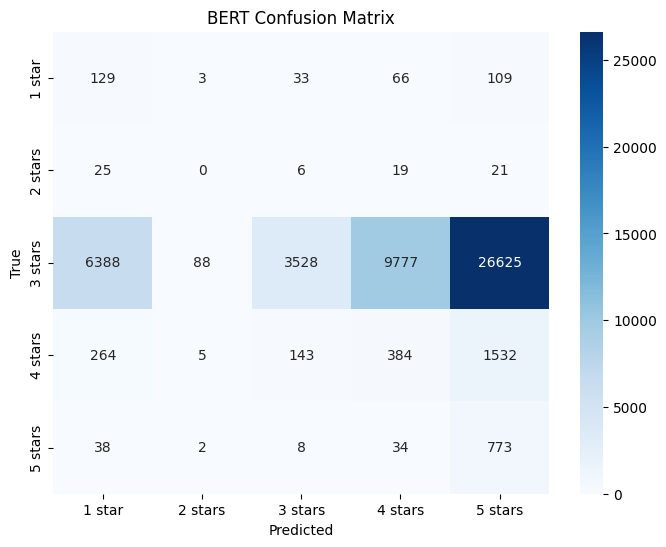

DistilBERT Evaluation Metrics:
              precision    recall  f1-score   support

     LABEL_0       0.99      0.15      0.26     49587
     LABEL_1       0.01      0.89      0.02       413

    accuracy                           0.16     50000
   macro avg       0.50      0.52      0.14     50000
weighted avg       0.99      0.16      0.26     50000

DistilBERT Accuracy: 0.15772


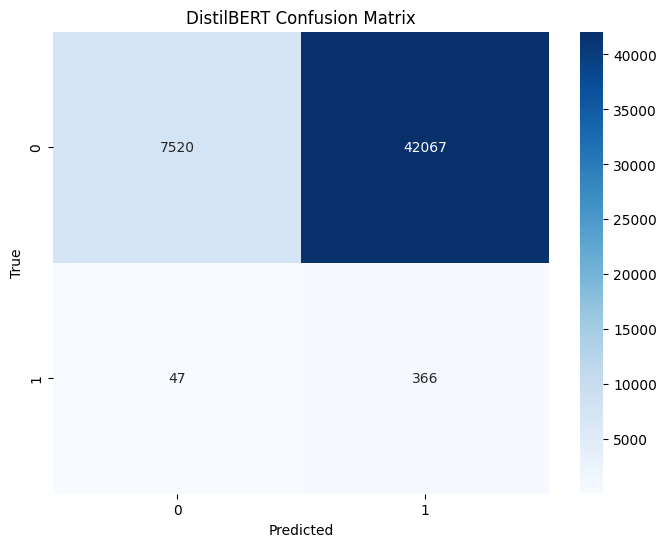

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Evaluation for BERT model
print("BERT Evaluation Metrics:")
print(classification_report(cleaned_df['True_Sentiment_bert'], cleaned_df['text_bert']))
print("BERT Accuracy:", accuracy_score(cleaned_df['True_Sentiment_bert'], cleaned_df['text_bert']))

# Confusion Matrix for BERT
cm_bert = confusion_matrix(cleaned_df['True_Sentiment_bert'], cleaned_df['text_bert'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues', xticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], yticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
plt.title("BERT Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluation for DistilBERT model
print("DistilBERT Evaluation Metrics:")
print(classification_report(cleaned_df['True_Sentiment_distilbert'], cleaned_df['text_distilbert']))
print("DistilBERT Accuracy:", accuracy_score(cleaned_df['True_Sentiment_distilbert'], cleaned_df['text_distilbert']))

# Confusion Matrix for DistilBERT
cm_distilbert = confusion_matrix(cleaned_df['True_Sentiment_distilbert'], cleaned_df['text_distilbert'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_distilbert, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title("DistilBERT Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print("Confusion matrix for BERT:\n", cm_bert)
print("\nConfusion matrix for DistillBERT:\n", cm_bert)

Confusion matrix for BERT:
 [[  129     3    33    66   109]
 [   25     0     6    19    21]
 [ 6388    88  3528  9777 26625]
 [  264     5   143   384  1532]
 [   38     2     8    34   773]]

Confusion matrix for DistillBERT:
 [[  129     3    33    66   109]
 [   25     0     6    19    21]
 [ 6388    88  3528  9777 26625]
 [  264     5   143   384  1532]
 [   38     2     8    34   773]]


3. Aggregate the results

In [ ]:
# Metrics for comparison (Accuracy, Precision, Recall, F1-Score)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Get classification report metrics for both models
report_bert = classification_report(cleaned_df['True_Sentiment_bert'], cleaned_df['text_bert'], output_dict=True)
report_distilbert = classification_report(cleaned_df['True_Sentiment_distilbert'], cleaned_df['text_distilbert'], output_dict=True)

# Collect the evaluation metrics for both BERT and DistilBERT models
metrics_summary = {
    'Model': ['BERT', 'DistilBERT'],
    'Accuracy': [
        accuracy_score(cleaned_df['True_Sentiment_bert'], cleaned_df['text_bert']),
        accuracy_score(cleaned_df['True_Sentiment_distilbert'], cleaned_df['text_distilbert'])
    ],
    'Precision': [
        report_bert['weighted avg']['precision'],
        report_distilbert['weighted avg']['precision']
    ],
    'Recall': [
        report_bert['weighted avg']['recall'],
        report_distilbert['weighted avg']['recall']
    ],
    'F1-Score': [
        report_bert['weighted avg']['f1-score'],
        report_distilbert['weighted avg']['f1-score']
    ]
}

# Create a DataFrame for better visualization and manipulation
results_df = pd.DataFrame(metrics_summary)

# Display the aggregated results
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,BERT,0.09628,0.883013,0.09628,0.134616
1,DistilBERT,0.15772,0.985651,0.15772,0.261116


4. Visualize the evaluation metrics

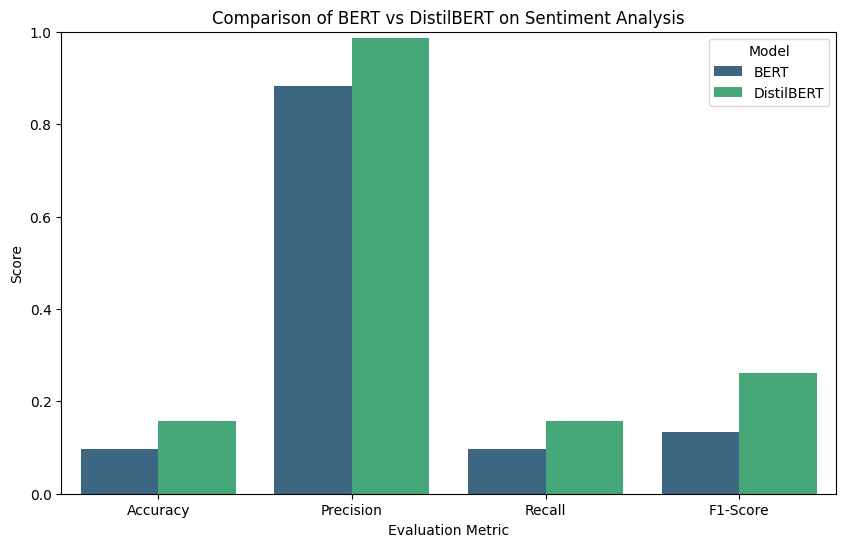

In [ ]:
# Convert DataFrame to a format suitable for Seaborn
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", palette="viridis")

plt.xlabel("Evaluation Metric")
plt.ylabel("Score")
plt.title("Comparison of BERT vs DistilBERT on Sentiment Analysis")
plt.ylim(0, 1)
plt.legend(title="Model")

plt.show()